This code is written to find the FPR for the prediction based on my method and a predictoin based on Poisson process

In [1]:
import numpy as np
import cte
from ProcessFunctions import Find_T_X_tau_without_p_input
import matplotlib.pyplot as plt


In [2]:
# def findT1T2(t,vmax,vthresh):
#     flag=0
#     T1=[]
#     T2=[]
#     for i in range(len(vmax)):
        
#         if flag==0 and vmax[i]>vthresh:
#             T1.append(t[i])
#             flag=1
#         if flag==1 and vmax[i]<vthresh:
#             T2.append(t[i])
#             flag=0
#     return T1,T2


In [3]:
number=1 # index of the initial condition
Tf = 250 # each initial condition is simulated for 250 years
N_m_load=30
coeff=2 # How the inital conditions are from the chaotic attractor
Nt=5     # it is recorded every Nt time stes
filter_ratio=0.3
L_thresh=1e3
V_thresh=5e-8
L=320e3
Nx=256
Nz=32
W=50e3
x_ox=np.linspace(-L/2,L/2,Nx)
z_ox=np.linspace(0,W,Nz)
mu=30e9

L_fault=L

In [4]:
Interevents=np.array([])

In [5]:
for number in range(30):
    data_dir="/central/groups/astuart/hkaveh/Data/LearnROM/Dataset2/SampleSimulation_Tf"+str(Tf)+"Nt="+str(Nt)+"N_m"+str(N_m_load)+"coeff"+str(coeff)+"number"+str(number)+".npz"
    data_smaple=np.load(data_dir)
    V_ox=data_smaple['array1']
    t_ox=data_smaple['array3']
    t=t_ox[:,0,0].reshape(-1,1)
    Start_index=int(V_ox.shape[0]*filter_ratio)
    V_ox=V_ox[Start_index:,:,:]
    t_ox=t_ox[Start_index:,:,:]
    vmax=np.max(V_ox,axis=(1,2))

    TimeStarts,TimeEnds,rectangles,Mags=Find_T_X_tau_without_p_input(V_ox,t_ox,V_thresh,L_thresh,cte.t_yr,x_ox,z_ox,L_fault,mu)
    # T1,T2=findT1T2(t_ox[:,0,0],vmax,V_thresh)
    TimeStarts=np.sort(TimeStarts)
    TimeEnds=np.sort(TimeEnds)
    Interevents=np.append(Interevents,np.diff(TimeStarts))

8960
12544
9984
35072
18176
3840
37120
5376
11520
2816
3072
30976
24576
15616
27392
51968
18688
1280
161.6572946886839
161.6935475089597
27904
4096
3328
18688
23296
9728
195.42618295068604
195.52582872962842
10496
12288
9472
16640
207.9137646614244
207.9582510184418
59392
37632
46336
6912
7424
1024
17152
7424
3328
5888
6144
11008
38656
10752
6144
6656
97.24831262115005
97.37589604556378
19968
48128
10752
29696
42752
8448
8192
9216
2560
6400
7680
23040
8448
19712
2304
5376
36096
7936
7424
43264
47872
4352
7424
6656
28928
6656
28416
5120
4352
11264
7168
4096
9984
5632
50944
8704
8960
4608
11264
6144
28160
5376
20992
26368
3840
4352
24064
7424
30464
36096
10496
40960
8192
1792
43520
768
8704
11008
2816
12800
8960
8448
10496
4864
16640
7168
1280
16896
9472
6144
3840
112384
17664
30464
1280
11776
3840
3328
9984
3328
14080
10240
13824
3584
39936
9728
11264
7936
5632
34304
5120
3072
55808
30720
44032
5376
22272
10752
4096
36864
40704
28928
21248
9472
81408
5376
5376
23296
8448
36352
8448
3456

(array([425., 238., 114., 106.,  96.,  76.,  52.,  79.,  68.,  42.,  73.,
         69.,  43.,  22.,  12.,   8.,   0.,   4.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.        ,  0.78869238,  1.57738475,  2.36607713,  3.15476951,
         3.94346189,  4.73215426,  5.52084664,  6.30953902,  7.0982314 ,
         7.88692377,  8.67561615,  9.46430853, 10.25300091, 11.04169328,
        11.83038566, 12.61907804, 13.40777041, 14.19646279, 14.98515517,
        15.77384755, 16.56253992, 17.3512323 , 18.13992468, 18.92861706,
        19.71730943, 20.50600181, 21.29469419, 22.08338657, 22.87207894,
        23.66077132, 24.4494637 , 25.23815608, 26.02684845, 26.81554083,
        27.60423321, 28.39292558, 29.18161796, 29.97031034, 30.75900272,
        31.54769509, 32.33638747, 33.12507985, 33.91377223, 34.7024646 ,
 

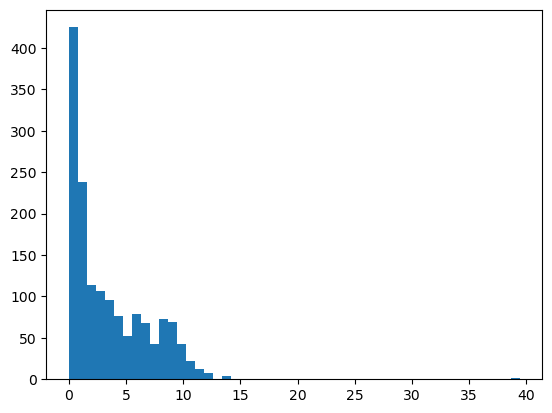

In [6]:
plt.hist(np.array(Interevents)/cte.t_yr,bins=50)

(125.0, 135.0)

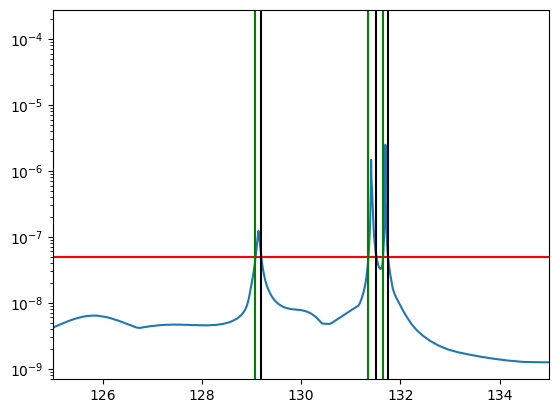

In [7]:
fig,ax=plt.subplots(1,1)
ax.plot(t_ox[:,0,0]/cte.t_yr,vmax,label='Vmax')
ax.set_yscale('log')
ax.axhline(y=V_thresh,color='r') 
for i in range(TimeStarts.shape[0]):
    ax.axvline(TimeStarts[i]/cte.t_yr,color='g')  
    ax.axvline(TimeEnds[i]/cte.t_yr,color='black')
ax.set_xlim([125,135])

In [8]:
Interevents.size

1528

In [12]:
np.mean(np.array(Interevents)/cte.t_yr)

3.489582464820926

In [13]:
lambda_poisson=1/np.mean(np.array(Interevents)/cte.t_yr)

In [51]:
lambda_poisson

0.28656723550200347

In [15]:
t_pred=0.4
FPR_poisson=1-np.exp(-lambda_poisson*t_pred)
print("FPR_poisson and TPR for the poisson process is ",FPR_poisson)

FPR_poisson and TPR for the poisson process is  0.10830122016532961


In [16]:
data=np.array([-0.10180324126911663,
 0.22437799589134902,
 0.081944761469984,
 0.06254279844784294,
 -0.027619265007989044,
 -0.11298790230540971,
 0.5087879479570875,
 0.5952978771969869,
 0.4261584113216161,
 0.13170509016206342,
 0.26706231454005935,
 0.06733622460625427,
 0.23008445560374344,
 0.3467244921250856,
 0.02191280529559461,
 -0.01711937913718329,
 -0.02465190595754394,
 0.09312942250627712,
 0.08354257018945446,
 np.NaN,
 -0.026706231454005927,
 0.10271627482309974,
 -0.0036521342159324347,
 0.42889751198356546])

(array([2., 0., 0., 0., 0., 0., 4., 1., 0., 1., 0., 0., 2., 2., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([-1.12987902e-01, -9.88221867e-02, -8.46564711e-02, -7.04907555e-02,
        -5.63250399e-02, -4.21593244e-02, -2.79936088e-02, -1.38278932e-02,
         3.37822415e-04,  1.45035380e-02,  2.86692536e-02,  4.28349692e-02,
         5.70006848e-02,  7.11664004e-02,  8.53321160e-02,  9.94978315e-02,
         1.13663547e-01,  1.27829263e-01,  1.41994978e-01,  1.56160694e-01,
         1.70326409e-01,  1.84492125e-01,  1.98657841e-01,  2.12823556e-01,
         2.26989272e-01,  2.41154987e-01,  2.55320703e-01,  2.69486419e-01,
         2.83652134e-01,  2.97817850e-01,  3.11983565e-01,  3.26149281e-01,
         3.40314997e-01,  3.54480712e-01,  3.68646428e-01,  3.82812143e-01,
         3.96977859e-01,  4.11143575e-01,  4.25309290e-01,  4.39475006e-01,
         4.536

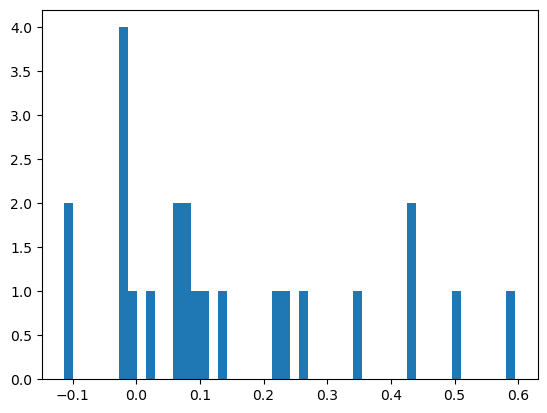

In [17]:
plt.hist(data,bins=50)

Loading the data for the for the my prediction

In [19]:
N_m_v_list=[20,25,30]
N_m_theta_list=[20,25,30]
index=0
N_m_v=N_m_v_list[index]
N_m_theta=N_m_theta_list[index]
Obs_linear=0
N_t=4000
m=80
sigma_kernel=2000
gamma_ratio=0.0001*5
version=2024.11
number=101
T_final=0.4*cte.t_yr 


In [49]:
tot_num_events=0
nans=0

In [50]:
for number in range(101,111):
    data=np.load('/central/groups/astuart/hkaveh/Data/LearnROM/FalsePositivePrediction'+"N_m_v"+str(N_m_v)+"N_m_theta"+str(N_m_theta)+"Obs_linear"+str(Obs_linear)+"N_t"+str(N_t)+"m"+str(m)+"sigma_kernel"+str(sigma_kernel)+"gamma_ratio"+str(gamma_ratio)+"version"+str(version)+"NumberinDataset"+str(number)+"T_final"+str(T_final)+".npz",allow_pickle=True)
    Mags_preds_events=np.array(data['Mags_preds_events'])
    print(Mags_preds_events)
    # count number of Nan in Mags_preds_events
    nan_count = sum(np.isnan(sub_arr).sum() for sub_arr in Mags_preds_events)
    print(nan_count)
    tot_num_events+=Mags_preds_events.size
    print(number)
    nans+=nan_count
print("The FPR of the prediction is ",1-nans/tot_num_events )
    


[[       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [7.22376238]
 [       nan]
 [       nan]]
9
101
[[      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [      nan]
 [6.0188218]
 [      nan]
 [      nan]
 [      nan]]
9
102
[[       nan]
 [5.26888643]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [6.93759442]]
8
103
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
10
104
[[       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [7.30632667]
 [       nan]]
9
105
[[       nan]
 [       nan]
 [       nan]
 [6.98765341]
 [5.60467179]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]]
8
106
[[       nan]
 [6.41712387]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [       nan]
 [7.07884534]
 [6.60575918]]
7
107
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 